[View in Colaboratory](https://colab.research.google.com/github/abhilashpandurangan/DSCWorkshop/blob/master/Intro_To_TensorFlow_Operations.ipynb)

## Introduction to TensorFlow 

<b>TensorFlow</b> is an open source software library created by <b>Google</b> extensively used in machine learning and deep learning systems. Here we'll learn how computations are represented and how to create your first tensor in a TensorFlow model.

# TensorFlow Programming Concepts

**Learning Objectives:**
  * Learn the basics of the TensorFlow programming model, focusing on the following concepts:
    * tensors
    * operations
    * graphs
    * sessions
  * Build a simple TensorFlow program that creates a default graph, and a session that runs the graph

**Note:** Please read through this tutorial carefully. The TensorFlow programming model is probably different from others that you have encountered, and thus may not be as intuitive as you'd expect.

## Overview of Concepts

TensorFlow gets its name from **tensors**, which are arrays of arbitrary dimensionality. Using TensorFlow, you can manipulate tensors with a very high number of dimensions. That said, most of the time you will work with one or more of the following low-dimensional tensors:

  * A **scalar** is a 0-d array (a 0th-order tensor).  For example, `"Howdy"` or `5`
  * A **vector** is a 1-d array (a 1st-order tensor).  For example, `[2, 3, 5, 7, 11]` or `[5]`
  * A **matrix** is a 2-d array (a 2nd-order tensor).  For example, `[[3.1, 8.2, 5.9][4.3, -2.7, 6.5]]`

TensorFlow **operations** create, destroy, and manipulate tensors.  Most of the lines of code in a typical TensorFlow program are operations.

A TensorFlow **graph** (also known as a **computational graph** or a **dataflow graph**) is, yes, a graph data structure.  A graph's nodes are operations (in TensorFlow, every operation is associated with a graph).  Many TensorFlow programs consist of a single graph, but TensorFlow programs may optionally create multiple graphs. A graph's nodes are operations; a graph's edges are tensors. Tensors flow through the graph, manipulated at each node by an operation. The output tensor of one operation often becomes the input tensor to a subsequent operation. TensorFlow implements a **lazy execution model,** meaning that nodes are only computed when needed, based on the needs of associated nodes.

Tensors can be stored in the graph as **constants** or **variables**. As you might guess, constants hold tensors whose values can't change, while variables hold tensors whose values can change. However, what you may not have guessed is that constants and variables are just more operations in the graph. A constant is an operation that always returns the same tensor value. A variable is an operation that will return whichever tensor has been assigned to it.

To define a constant, use the `tf.constant` operator and pass in its value. For example:

```
  x = tf.constant(5.2)
```

Similarly, you can create a variable like this:

```
  y = tf.Variable([5])
```

Or you can create the variable first and then subsequently assign a value like this (note that you always have to specify a default value):

```
  y = tf.Variable([0])
  y = y.assign([5])
```

Once you've defined some constants or variables, you can combine them with other operations like `tf.add`. When you evaluate the `tf.add` operation, it will call your `tf.constant` or `tf.Variable` operations to get their values and then return a new tensor with the sum of those values.

Graphs must run within a TensorFlow **session**, which holds the state for the graph(s) it runs:

```
with tf.Session() as sess:
  initialization = tf.global_variables_initializer()
  print(y.eval())
```

When working with `tf.Variable`s, you must explicitly initialize them by calling `tf.global_variables_initializer` at the start of your session, as shown above.

**Note:** A session can distribute graph execution across multiple machines (assuming the program is run on some distributed computation framework). For more information, see [Distributed TensorFlow](https://www.tensorflow.org/deploy/distributed).

### Summary

TensorFlow programming is essentially a two-step process:

  1. Assemble constants, variables, and operations into a graph.
  2. Evaluate those constants, variables and operations within a session.


#### 1. Import required libraries 

In [0]:
import tensorflow as tf
import numpy as np


#### 2. Create Tensor

Tensorflow handles the flow of Tensors (data). You can think of a Tensor as a multidimensional array.

<img src="https://github.com/Praneet460/MLCC/blob/master/Day1/add-graph.png?raw=1"/>

In TensorFlow, constants are created using the function constant(used below as <i>tf.constant</i>), which has the signature </br>
<b><i>constant(value, dtype=None, shape=None, name="Const", verify_shape=False)</i></b>, where
* <b>value</b> is an actual constant value which will be used in further computation
* <b>dtype</b> is the data type parameter (e.g. <i>float32/64, int8/16,</i> etc.)
* <b>shape</b> is an optional dimensions
* <b>name</b> is an optional name for the tensor
* <b>verify_shape</b> is a boolean which indicates verification of the shape of values.

In [4]:
# Create nodes in a graph
a = tf.constant(15, name="a")
b = tf.constant(61, name="b")

# add them
c = tf.add(a, b, name="c")
print(c)

Tensor("c_1:0", shape=(), dtype=int32)


<b>Notice</b> that the output is still an abstract Tensor -- we have just created a computation graph consisting of operations. To actually get our result, we have to run a <b>session</b> (A session encapsulates the control  and state of the TensorFlow runtime.) to execute the graph.

In [3]:
with tf.Session() as session:
    print(session.run(c))

76


<p>Similar, as adding, you can perform other mathematical operations on tensors as well, like substraction, multiplication or division.</p>

In [5]:
# subtract them
z = tf.subtract(a, b, name="z")
with tf.Session() as session:
    print(session.run(z))

-46


In [6]:
# multiply them
y = tf.multiply(a, b, name="y")
with tf.Session() as session:
    print(session.run(y))

915


In [7]:
# divide them
x = tf.divide(a, b, name="x")
with tf.Session() as session:
    print(session.run(x))

0.2459016393442623


#### 3. Building and Executing the Computation Graph

Consider the following computation graph:

<img src="https://github.com/Praneet460/MLCC/blob/master/Day1/computation-graph.png?raw=1"/>

This graph takes 2 inputs, a, b and computes as output e. Each node in the graph is an operation that takes some input, does some computation, and passes its output to another node.

TensorFlow uses <b><i>tf.placeholder</i></b> to handle inputs to the model. It lets you specify that some input will be coming in, of some shape and some type. <i>It allow developers to inject data into the computation graph.</i> The signature of the placeholder is:</br>
<b><i>placeholder(dtype, shape=None, name=None)</i></b>

In [7]:
# define inputs
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# c = a+b
c = tf.add(a, b, name="c")
# d = b-1
d = tf.subtract(b, 1, name="d")
# e = c*d
e = tf.multiply(c, d, name="e")

with tf.Session() as session:
    print(session.run(e, feed_dict={a:2.0, b:4.0}))

18.0


We used <b><i>feed_dict</i></b> to pass in the input data of tensor <i>a</i> and tensor <i>b</i>.

In [8]:
# Import required library
import tensorflow as tf
# Define a hello tensor as a tf.constant
hello = tf.constant("Hello, TensorFlow", name="hello")

with tf.Session():
    print(hello.eval()) # Shorthand for session.run(hello)

b'Hello, TensorFlow'


#### 1. Matrix Operations

<p>Matrix operations are very important for machine learning models, like linear regression, as they are often used in them. TensorFlow supports all the most common matrix operations, like <b>multiplication</b>, <b>transposing</b>, <b>inversion</b>, calculating the <b>determinant</b>, solving linear equations, and many more.
<p>We will see some of the matrix operations in below code.</p>

##### 1.1 Sum of Matrices

In [9]:
# declare two matrices
matrix_1 = tf.constant([[5, 6], [7, 8]], name="matrix_1")
matrix_2 = tf.constant([[1, 0], [0, 1]], name="matrix_2")

# add two matrices
matrix_sum = tf.add(matrix_1, matrix_2, name="matrix_sum")

print(matrix_sum)
print("\n")

with tf.Session():
    print("Matrix Sum:\n ",matrix_sum.eval()) # Shorthand of session.run(matrix_sum)

Tensor("matrix_sum:0", shape=(2, 2), dtype=int32)


Matrix Sum:
  [[6 6]
 [7 9]]


By performing the print operation we see the <i>shape of the matrix as (2, 2) i.e. matrix of two rows and two columns</i>

##### 1.2 Matrix Substraction

In [10]:
# subtract two matrices
matrix_subtract = tf.subtract(matrix_1, matrix_2, name = "matrix_subtract")
print(matrix_subtract)
print("\n")
with tf.Session():
    print("Matrix Substraction:\n ", matrix_subtract.eval())

Tensor("matrix_subtract:0", shape=(2, 2), dtype=int32)


Matrix Substraction:
  [[4 6]
 [7 7]]


##### 1.3 Matrix Multiplication

In [11]:
# multiply two matrices
matrix_multiply = tf.multiply(matrix_1, matrix_2, name="matrix_multiply")
print(matrix_multiply)
print("\n")
with tf.Session():
    print("Matrix Multiplication:\n", matrix_multiply.eval())

Tensor("matrix_multiply:0", shape=(2, 2), dtype=int32)


Matrix Multiplication:
 [[5 0]
 [0 8]]


##### 1.4 Other Operations

<p> We can also build a tensor in TensorFlow, by building an n-dimensional array, using the <i>NumPy library</i>.</p>

```np.array(np.random.rand(4, 4), dtype="float32```
<p> Creates an array of specified shape (here we choose (4, 4) i.e. matrix of four rows and four columns), and fills it with random values. The dtype of these random values can be choosen by the developer (here we used float variables).</p>

In [12]:
# Import the required library
import numpy as np

# Creating a 2-d tensor, or matrix
tensor_2d = np.array(np.random.rand(4, 4), dtype="float32")
tensor_2d_1 = np.array(np.random.rand(4, 4), dtype="float32")
tensor_2d_2 = np.array(np.random.rand(4, 4), dtype="float32")


# look out the matrices
print("tensor_2d =\n", tensor_2d)
print("\n")
print("tensor_2d_1 =\n", tensor_2d_1)
print("\n")
print("tensor_2d_2 =\n", tensor_2d_2)

tensor_2d =
 [[0.82423455 0.3161063  0.38326898 0.45608622]
 [0.8860388  0.9649723  0.16914228 0.04887802]
 [0.9135227  0.99406135 0.8649825  0.44900233]
 [0.41159463 0.20047739 0.7209606  0.34490275]]


tensor_2d_1 =
 [[0.45341352 0.4752891  0.62945443 0.7146795 ]
 [0.73119736 0.09203945 0.16442895 0.07015086]
 [0.5454743  0.8968402  0.4227305  0.31750292]
 [0.3521292  0.7280671  0.1586175  0.17661692]]


tensor_2d_2 =
 [[0.29132897 0.96868914 0.4778899  0.80427873]
 [0.7088874  0.6643472  0.24102885 0.31319866]
 [0.8153068  0.6551186  0.57539415 0.34262046]
 [0.31039834 0.774117   0.98507845 0.9340596 ]]


<p>A NumPy array generated above can be easily converted into a TensorFlow tensor with the auxiliary function <b><i>convert_to_tensor</i></b>, which helps developers convert Python objects to tensor objects. The signature of the convert_to_tensorflow is:</p>
<b>tf.convert_to_tensor(value, dtype=None, name=None, preferred_dtype=None)</b>

In [13]:
# converting the array into tensor
mat_1 = tf.convert_to_tensor(tensor_2d)
mat_2 = tf.convert_to_tensor(tensor_2d_1)
mat_3 = tf.convert_to_tensor(tensor_2d_2)

print("mat_1:\n", mat_1)
print("mat_2:\n", mat_2)
print("mat_3:\n", mat_3)

mat_1:
 Tensor("Const:0", shape=(4, 4), dtype=float32)
mat_2:
 Tensor("Const_1:0", shape=(4, 4), dtype=float32)
mat_3:
 Tensor("Const_2:0", shape=(4, 4), dtype=float32)


In [14]:
# transpose of the matrix
mat_transpose = tf.transpose(mat_1)
with tf.Session():
    print(mat_transpose.eval())

[[0.82423455 0.8860388  0.9135227  0.41159463]
 [0.3161063  0.9649723  0.99406135 0.20047739]
 [0.38326898 0.16914228 0.8649825  0.7209606 ]
 [0.45608622 0.04887802 0.44900233 0.34490275]]


In [15]:
# matrix multiplication
mat_multiply = tf.matmul(mat_1, mat_2)
with tf.Session():
    print(mat_multiply.eval())

[[0.9745198  1.0966363  0.80515784 0.8134802 ]
 [1.2168013  0.69722015 0.79564494 0.7632632 ]
 [1.7709911  1.6283352  1.1753474  1.0765461 ]
 [0.8479269  1.1117771  0.65152395 0.59804463]]


In [16]:
# Matrix determinant
mat_determinant = tf.matrix_determinant(mat_3)
with tf.Session():
    print(mat_determinant.eval())

-0.030954028


In [17]:
# Matrix inverse
mat_inverse = tf.matrix_inverse(mat_3)
with tf.Session():
    print(mat_inverse.eval())

[[-3.6145473  6.0992284 -3.709319   2.4278128]
 [ 5.796398  -7.993853   6.6936975 -4.76592  ]
 [ 1.7938776 -6.125657   5.2201695 -1.4054425]
 [-5.4945645 11.058437  -9.82016    5.695848 ]]


In [18]:
# Matrix solve
mat_solve = tf.matrix_solve(mat_3, [[1], [1], [1], [1]])
with tf.Session():
    print(mat_solve.eval())

[[ 1.203175  ]
 [-0.26967746]
 [-0.51705223]
 [ 1.4395605 ]]


##### 1.5 Sequential Operations
<p>Result of multiplication of mat_1 by itself, is added with the result of multiplication of mat_1 by matrix(4x4) of all ones's</p> 

In [19]:
result = tf.matmul(mat_1, mat_1) + tf.matmul(mat_1, tf.ones([4, 4], dtype="float32"))
with tf.Session():
    print(result.eval())

[[3.4769886 3.0177035 3.0094078 2.7004628]
 [3.8289711 3.458222  2.7533844 2.6131108]
 [5.830291  5.419441  4.8117394 4.2300434]
 [2.9953907 2.7873225 2.7418756 2.3181279]]


##Generic Example for Linear Regression Using TensorFlow

Epoch: 0050 cost= 0.198776424 W= 0.44471574 b= -0.6022282
Epoch: 0100 cost= 0.184704676 W= 0.43311098 b= -0.5187445
Epoch: 0150 cost= 0.172257870 W= 0.42219627 b= -0.4402255
Epoch: 0200 cost= 0.161248505 W= 0.4119308 b= -0.36637628
Epoch: 0250 cost= 0.151510507 W= 0.40227586 b= -0.29691878
Epoch: 0300 cost= 0.142897278 W= 0.39319512 b= -0.2315927
Epoch: 0350 cost= 0.135278866 W= 0.38465452 b= -0.17015189
Epoch: 0400 cost= 0.128540456 W= 0.37662175 b= -0.112365164
Epoch: 0450 cost= 0.122580387 W= 0.3690668 b= -0.058015235
Epoch: 0500 cost= 0.117308803 W= 0.3619612 b= -0.0068977275
Epoch: 0550 cost= 0.112646230 W= 0.3552781 b= 0.041179523
Epoch: 0600 cost= 0.108522333 W= 0.3489926 b= 0.0863974
Epoch: 0650 cost= 0.104874946 W= 0.3430808 b= 0.12892583
Epoch: 0700 cost= 0.101648949 W= 0.3375207 b= 0.16892505
Epoch: 0750 cost= 0.098795764 W= 0.3322913 b= 0.20654516
Epoch: 0800 cost= 0.096272282 W= 0.32737282 b= 0.24192825
Epoch: 0850 cost= 0.094040446 W= 0.32274693 b= 0.27520666
Epoch: 0900 

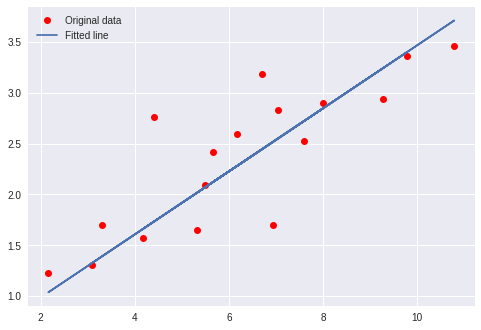

Testing... (Mean square loss Comparison)
Testing cost= 0.080163315
Absolute mean square loss difference: 0.008613743


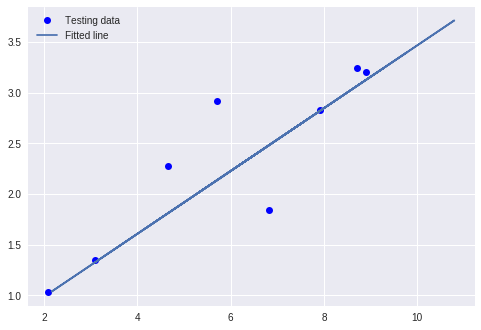

In [20]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()